In [136]:
!pip install matplotlib
!pip install seaborn

     ------------------------------------ 292.8/292.8 KB 951.4 kB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 37.0/37.0 MB 2.5 MB/s eta 0:00:00


In [137]:
import numpy as np
import matplotlib as plt
import math as mt
import seaborn as sb
import pandas as pd

%matplotlib inline

In [298]:
class prognoz:
    ''' 
    
        '''
    value = 0 
    
    def __init__(self, array_x, array_y):
        self.array_x = array_x
        self.array_y = array_y
    
    def sum_x(self):
        return(sum(self.array_x))
        
    def sum_y(self):
        return(sum(self.array_y[i] for i in range(len(self.array_y))))

    def square_x(self):
        return(sum(self.array_x[i]**2 for i in range(len(self.array_x))))
        
    def sum_xy(self):
        return(sum([self.array_x[i] * self.array_y[i] for i in range(len(self.array_x))]))
    
    def var_a(self):
        return((len(self.array_x)*prognoz.sum_xy(self) - prognoz.sum_x(self) * prognoz.sum_y(self))/
        (len(self.array_x)*prognoz.square_x(self) - (prognoz.sum_x(self)**2)))
    
    def var_b(self):
        return((prognoz.sum_y(self)-prognoz.var_a(self)*prognoz.sum_x(self)) / (len(self.array_x)))
    
    def array_f(self):
        return([prognoz.var_a(self)*self.array_x[i] + prognoz.var_b(self) 
                for i in range(len(self.array_x))])
    
    def approx_func(self):
        a = [prognoz.array_f(self)[i] - (prognoz.var_a(self)*self.array_x[i]+ prognoz.var_b(self)) 
                                         for i in range(len(prognoz.array_f(self)))]
        return([a[i]**2 for i in range(len(a))]) 
     
        '''тут начинается расчет квадратичной функции
        она отличается только тем что добавляются 3 и 4 степени массива x.
            '''
        
    def sum_3_degree(self):
        return(sum(self.array_x[i]**3 for i in range(len(self.array_x))))

    def sum_4_degree(self):
        return(sum(self.array_x[i]**4 for i in range(len(self.array_x))))

    def sum_x2_y(self):
        return(sum([(self.array_x[i]**2)*self.array_y[i] for i in range(len(self.array_x))]))


    def main_matrix(self):
        '''
        основная матрица имеет вид (если что)
            ax^4+bx^3+сx^2
            ax^3+bx^2+cx
            ax^2+bx+cn, 
            где n - длина массива
            '''
        return([
                [prognoz.sum_4_degree(self), prognoz.sum_3_degree(self),prognoz.square_x(self)],
                [prognoz.sum_3_degree(self), prognoz.square_x(self), prognoz.sum_x(self)],
                [prognoz.square_x(self), prognoz.sum_x(self), len(self.array_x)]
                ])
    
    def det(self):
        return(np.linalg.det(np.matrix(prognoz.main_matrix(self))))

    def var_abc(self):
        a = np.array(prognoz.main_matrix(self))
        b = np.array([prognoz.sum_x2_y(self), prognoz.sum_xy(self), prognoz.sum_y(self)])
        return(np.linalg.inv(a).dot(b))
        
    def array_square_f(self):
        return([prognoz.var_abc(self)[0]*(self.array_x[i]**2)+
                (prognoz.var_abc(self)[1]*self.array_x[i])+
                prognoz.var_abc(self)[2] for i in range(len(self.array_x))])
        
    ''' дальше идет общие задания для пунктов'''
    def dispersion(self):
        '''
        тут должна быть расчитана дисперсия
            '''
    def function_str(self):
        '''
        тут должна быть выведена функция
            '''
        #по рисунку, он еще недоработан
    def draw_board(self):

        list_xy = {
            'x': self.array_x,
            'y': self.array_y
        }

        list_xf = {
            'x': self.array_x,
            'y': self.array_y,
            'f': prognoz.array_f(self)
        }
        
        list_xf_2 = {
            'x': self.array_x,
            'y': self.array_y,
            'f^2': prognoz.array_square_f(self),
        }

        df_xy = pd.DataFrame(list_xy)
        df_xf = pd.DataFrame(list_xf)
        df_xf_2 = pd.DataFrame(list_xf_2)

        print(df_xy)
        print(df_xf)
        print(df_xf_2)

        sb.scatterplot(data = df_xy, x='x', y='y')
        sb.lineplot(data = df_xf, x='x', y='f')
       
        sb.scatterplot(data = df_xy, x='x', y='y')
        sb.lineplot(data = df_xf_2, x='x', y='f^2')

In [299]:
prog = prognoz([1, 2, 3, 4, 5], [155,15,256,45,650])

In [301]:
print(prog.array_square_f())

[168.48571428571694, 48.0571428571447, 75.9142857142877, 252.05714285714595, 576.4857142857193]


15
1121
55
4383
-81.8
102.0
[20.200000000000003, 122.2, 224.2, 326.2, 428.2]
[0.0, 0.0, 0.0, 0.0, 0.0]
   x    y
0  1  155
1  2   15
2  3  256
3  4   45
4  5  650
   x    y      f
0  1  155   20.2
1  2   15  122.2
2  3  256  224.2
3  4   45  326.2
4  5  650  428.2
   x    y         f^2
0  1  155  168.485714
1  2   15   48.057143
2  3  256   75.914286
3  4   45  252.057143
4  5  650  576.485714
None


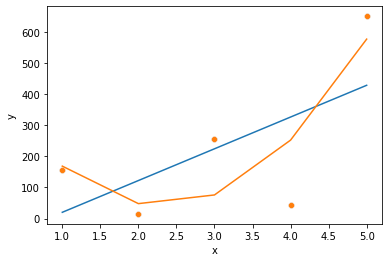

In [303]:
print(prog.sum_x()) #сумма х
print(prog.sum_y()) #сумма значений y
print(prog.square_x()) #сумма квадратов x
print(prog.sum_xy()) #сумма произведений x и y
print(prog.var_b()) #значение b в линейной функции
print(prog.var_a()) #значение a в квадратичной
print(prog.array_f()) #аппроксимированные значения
print(prog.approx_func()) #поиск отклонений, где функция стремится к минимуму для линейной функции 
print(prog.draw_board()) #прорисовка (не закончена)